In [1]:
# Notebook: Load Olivetti Faces Dataset
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
import numpy as np

data = fetch_olivetti_faces()

# Flatten the image data into a 2D array (rows = samples, columns = pixels)
X = data.images.reshape((len(data.images), -1))  # Each image becomes a row of 4096 pixels
y = data.target

df = pd.DataFrame(X)
df['target'] = y

# Preview the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [2]:

print("Shape: ", df.shape)

Shape:  (400, 4097)


In [3]:
# Split & Scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split 80:20
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

#Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 4096)
X_test shape: (80, 4096)
y_train shape: (320,)
y_test shape: (80,)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

results_df = pd.DataFrame(results, index=models.keys())
results_df = results_df.T  # Transpose so indices are metrics

print(results_df)


           Logistic Regression  Random Forest  K-Nearest Neighbors  \
Accuracy                0.9625       0.937500             0.812500   
Precision               0.9750       0.958333             0.825000   
Recall                  0.9625       0.937500             0.812500   
F1-Score                0.9600       0.933333             0.803333   

           Support Vector Machine  Naive Bayes  
Accuracy                 0.975000     0.875000  
Precision                0.983333     0.879167  
Recall                   0.975000     0.875000  
F1-Score                 0.973333     0.858333  


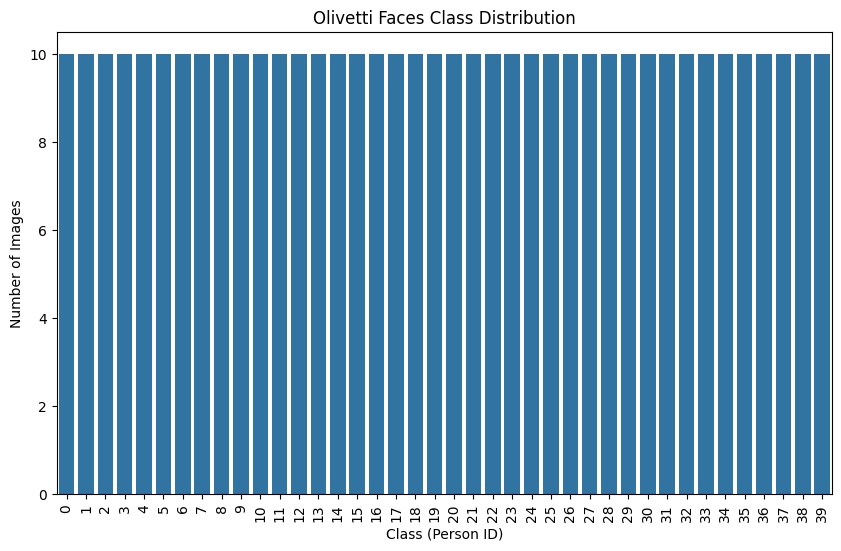

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title("Olivetti Faces Class Distribution")
plt.xlabel("Class (Person ID)")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)
plt.show()

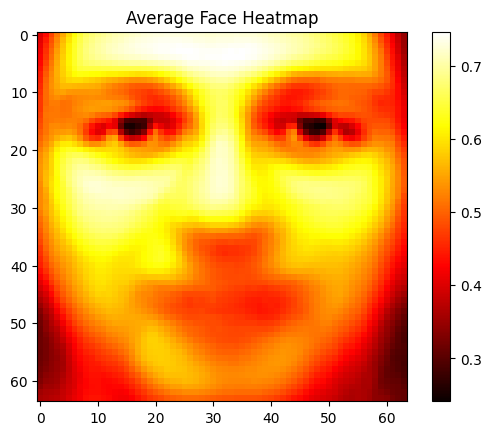

In [12]:
X = data.images

# Compute the average face
avg_face = np.mean(X, axis=0)

# Plot heatmap
plt.imshow(avg_face, cmap='hot')
plt.title("Average Face Heatmap")
plt.colorbar()
plt.show()


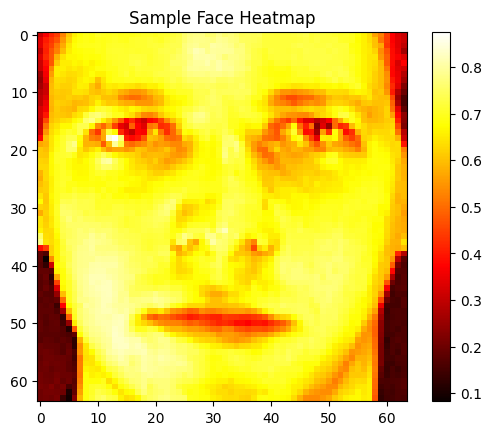

In [7]:
plt.imshow(X[0], cmap='hot')
plt.title("Sample Face Heatmap")
plt.colorbar()
plt.show()

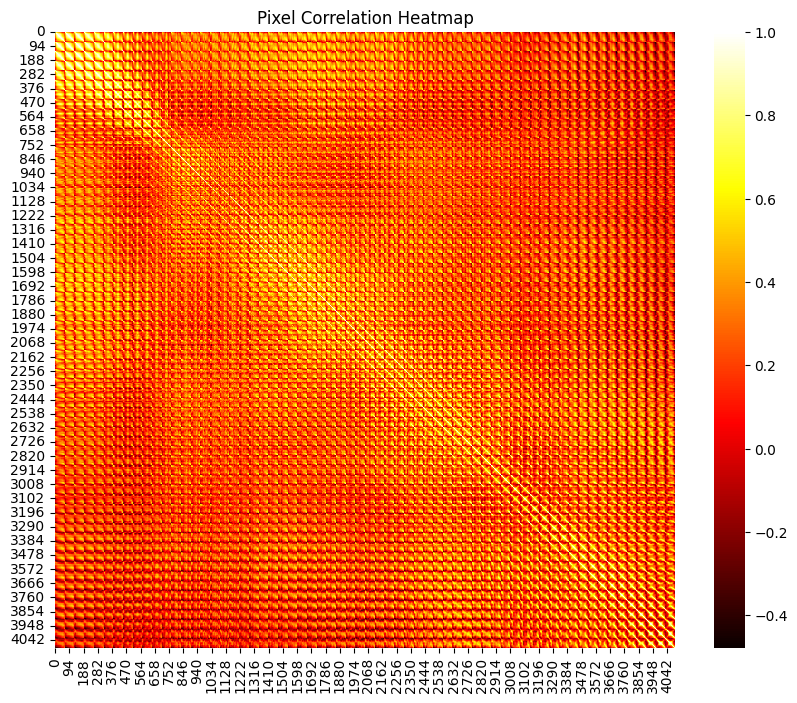

In [13]:
# Flatten the images and convert to DataFrame
X_flat = X.reshape(X.shape[0], -1)
df = pd.DataFrame(X_flat)

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='hot')
plt.title("Pixel Correlation Heatmap")
plt.show()


In [8]:
# NO Features so no pairplot, because no relationship


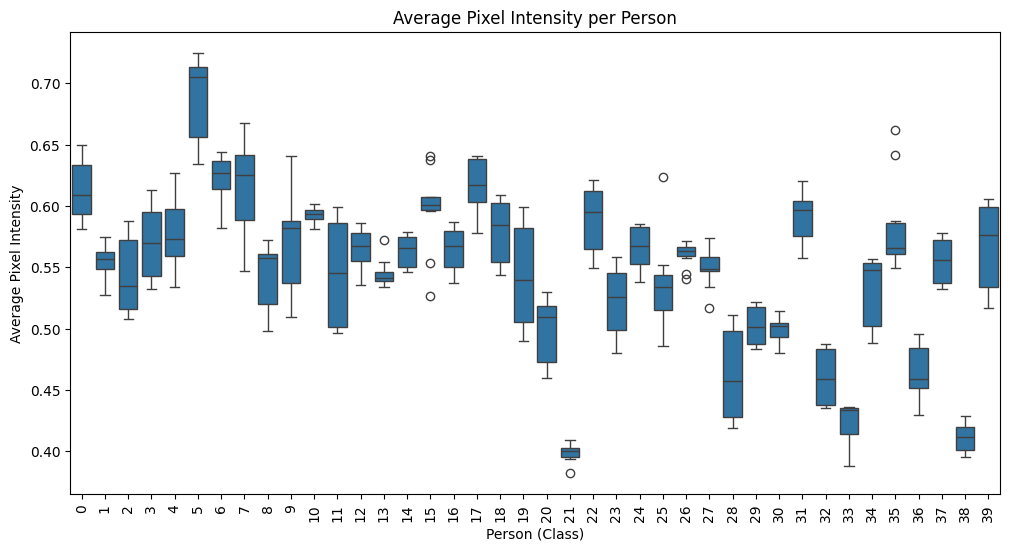

In [9]:
#Compute the mean of all pixels in each image.
#One boxplot per class (person) shows how brightness varies across images of that person.

# Load data
data = fetch_olivetti_faces()
X = data.images.reshape(data.images.shape[0], -1)
y = data.target

# Average pixel per image
avg_pixel = X.mean(axis=1)

# DataFrame for boxplot
df_avg = pd.DataFrame({'Person': y, 'AvgPixel': avg_pixel})

plt.figure(figsize=(12,6))
sns.boxplot(x='Person', y='AvgPixel', data=df_avg)
plt.title("Average Pixel Intensity per Person")
plt.xlabel("Person (Class)")
plt.ylabel("Average Pixel Intensity")
plt.xticks(rotation=90)
plt.show()

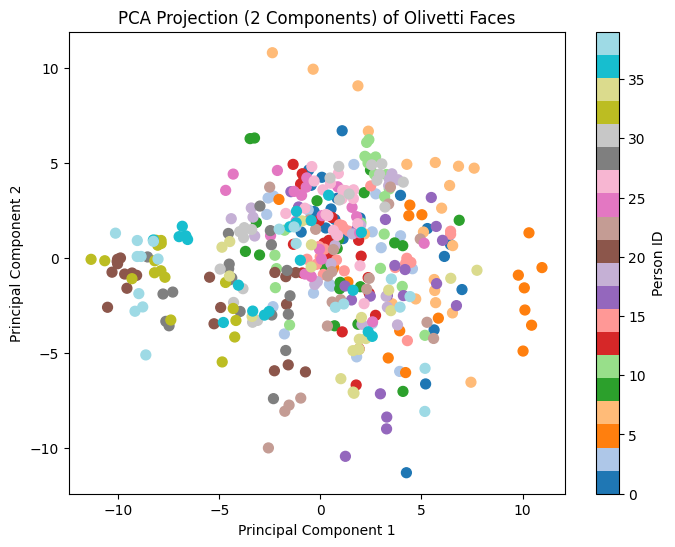

In [14]:
from sklearn.decomposition import PCA

data = fetch_olivetti_faces()
X = data.images.reshape((data.images.shape[0], -1))
y = data.target

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab20', s=50)
cbar = plt.colorbar(scatter)
cbar.set_label('Person ID')

plt.title("PCA Projection (2 Components) of Olivetti Faces")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
